<a href="https://colab.research.google.com/github/aaryyya/MLDLAlgorithmsTYITAssignments/blob/main/Assignment2LinR_LogR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# prompt: give me one code along with dataset for linear regression take datset from github

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Download the dataset (replace with your actual GitHub raw data URL)
!wget -q https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv

# Load the dataset
data = pd.read_csv('advertising.csv')

# Define features (X) and target (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example prediction (replace with your own values)
new_data = pd.DataFrame({'TV': [100], 'Radio': [25], 'Newspaper': [10]})
predicted_sales = model.predict(new_data)
print(f"Predicted sales for new data: {predicted_sales[0]}")

Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826
Predicted sales for new data: 12.73205401398034


In [11]:
# prompt: overfittng model for logistic regression so provide a different dataset for it from github

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Download the Wisconsin Breast Cancer dataset
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

# Load the dataset
data = pd.read_csv('wdbc.data', header=None)

# Assign column names (first column is ID, second is diagnosis, rest are features)
data.columns = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

# Drop the ID column
data = data.drop('id', axis=1)

# Encode the diagnosis (M=malignant, B=benign)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # Encode malignant as 1, benign as 0

# Define features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[70  1]
 [ 2 41]]


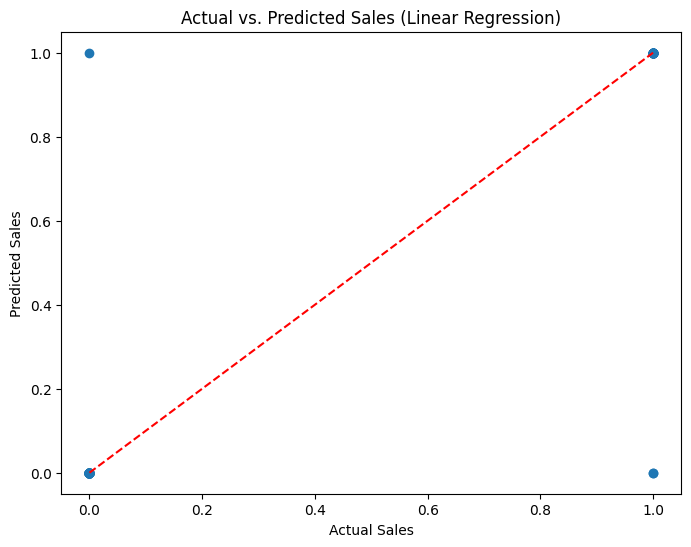

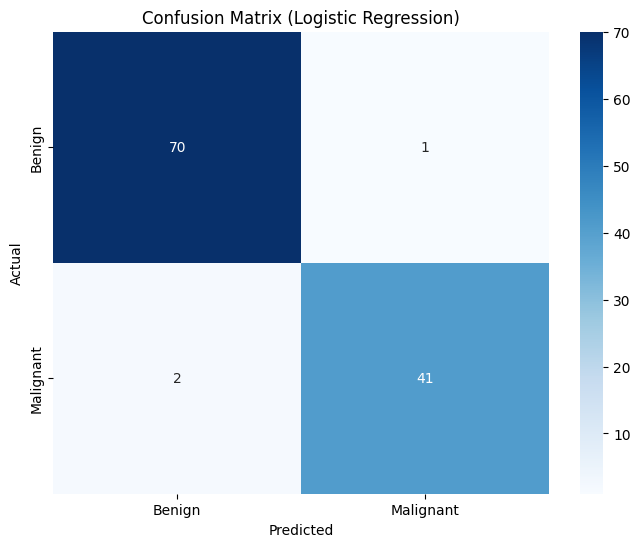

In [17]:
# prompt: now generate the code for viusualization of logistic regression and linear regression

import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code) ...


# Visualization for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (Linear Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add diagonal line
plt.show()


# Visualization for Logistic Regression (Confusion Matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()